
--- LASSO for AAPL ---


/home/alessio/MarGui-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.923e+03, tolerance: 7.153e+01
  model = cd_fast.enet_coordinate_descent(
/home/alessio/MarGui-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.031e+03, tolerance: 2.140e+02
  model = cd_fast.enet_coordinate_descent(
/home/alessio/MarGui-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

Best params: {'lasso__alpha': 0.001, 'lasso__max_iter': 10000}
RMSE: 7.0725 | MAE: 4.8479 | R2: 0.7964
Top coefficients:
 Low            29.014087
Open           21.230926
High           17.633915
SMA20          15.773949
MACD            5.498252
Signal_Line     4.312096
Boll_Up         1.947356
WMA20           1.935476
Return          0.472366
Boll_Down       0.405441


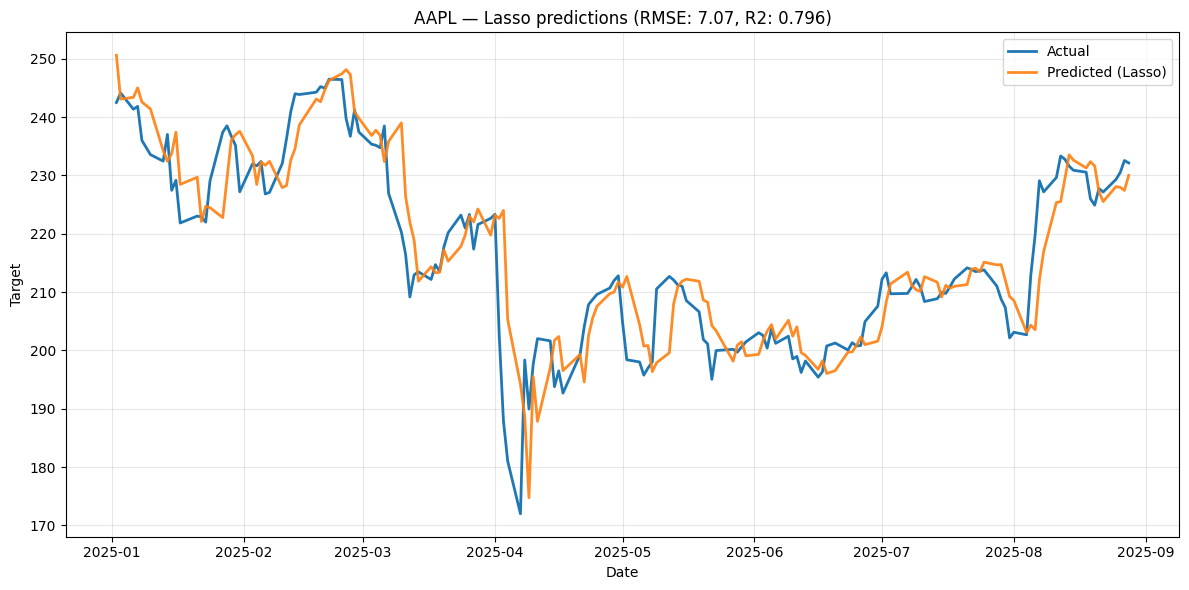


--- LASSO for META ---


/home/alessio/MarGui-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.235e+04, tolerance: 1.206e+03
  model = cd_fast.enet_coordinate_descent(
/home/alessio/MarGui-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.202e+04, tolerance: 1.758e+03
  model = cd_fast.enet_coordinate_descent(
/home/alessio/MarGui-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

Best params: {'lasso__alpha': 0.001, 'lasso__max_iter': 1000}
RMSE: 21.2794 | MAE: 16.1972 | R2: 0.9138
Top coefficients:
 High           84.716108
Low            39.723478
Open           37.350824
SMA20          36.381614
MACD           10.145981
Signal_Line     7.495088
Boll_Up         2.298877
WMA20           2.265076
Return          1.317513
Volume          1.059732


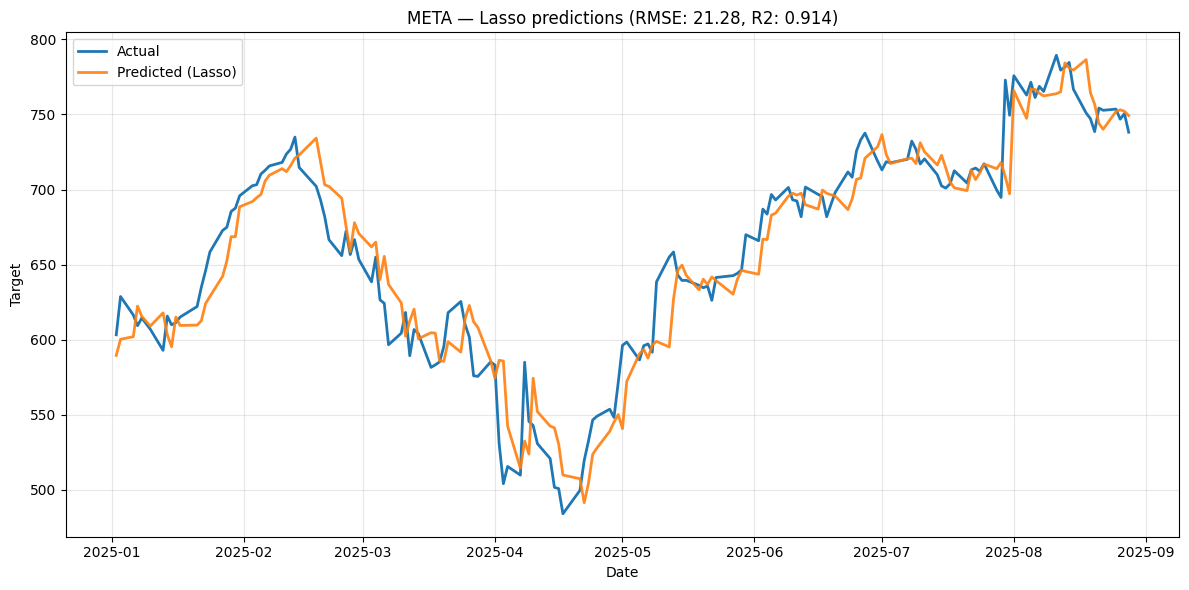


--- LASSO for ORCL ---


/home/alessio/MarGui-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.520e+03, tolerance: 7.975e+01
  model = cd_fast.enet_coordinate_descent(
/home/alessio/MarGui-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.923e+02, tolerance: 1.686e+01
  model = cd_fast.enet_coordinate_descent(
/home/alessio/MarGui-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

Best params: {'lasso__alpha': 0.01, 'lasso__max_iter': 5000}
RMSE: 7.8935 | MAE: 5.7878 | R2: 0.9609
Top coefficients:
 High           18.222777
Low            13.768424
Boll_Down       0.505790
EMA20           0.400672
Signal_Line     0.302806
RSI             0.299642
Return          0.278355
WMA20           0.276949
Volume          0.025969
MACD            0.001266


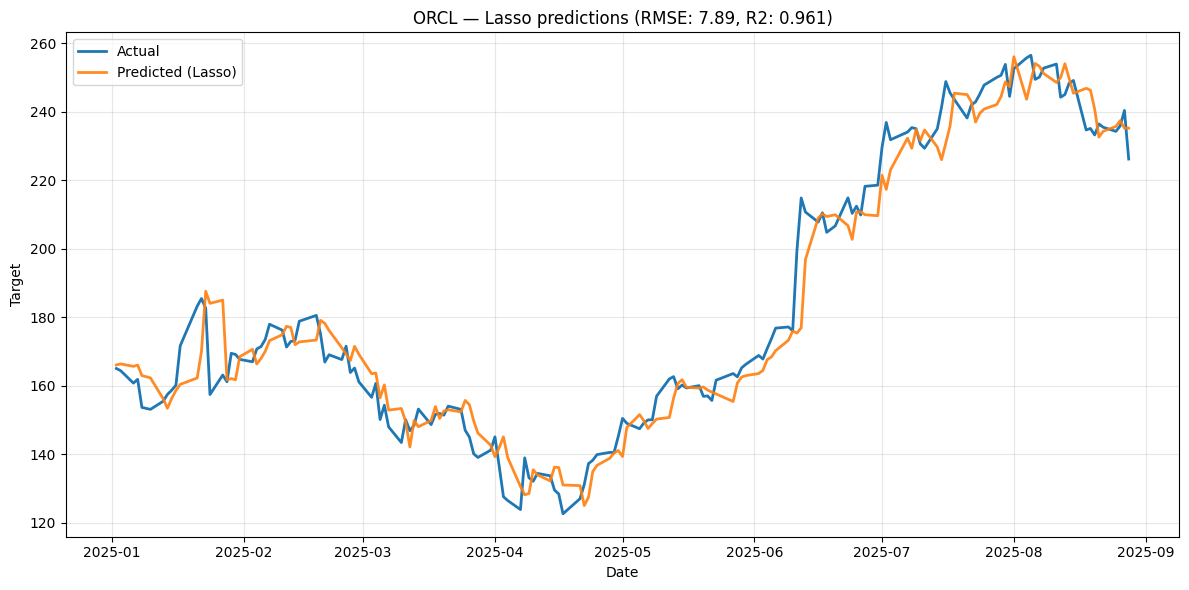


--- LASSO for MSFT ---


/home/alessio/MarGui-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.275e+04, tolerance: 7.771e+02
  model = cd_fast.enet_coordinate_descent(
/home/alessio/MarGui-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.849e+04, tolerance: 3.885e+02
  model = cd_fast.enet_coordinate_descent(
/home/alessio/MarGui-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

Best params: {'lasso__alpha': 0.001, 'lasso__max_iter': 5000}
RMSE: 9.9277 | MAE: 7.3055 | R2: 0.9622
Top coefficients:
 Low            50.358304
High           36.543251
Open           29.580654
SMA20          23.148599
MACD            7.462072
WMA20           6.232784
Boll_Up         6.197579
Signal_Line     6.149497
Boll_Down       1.328199
STD20           0.805974


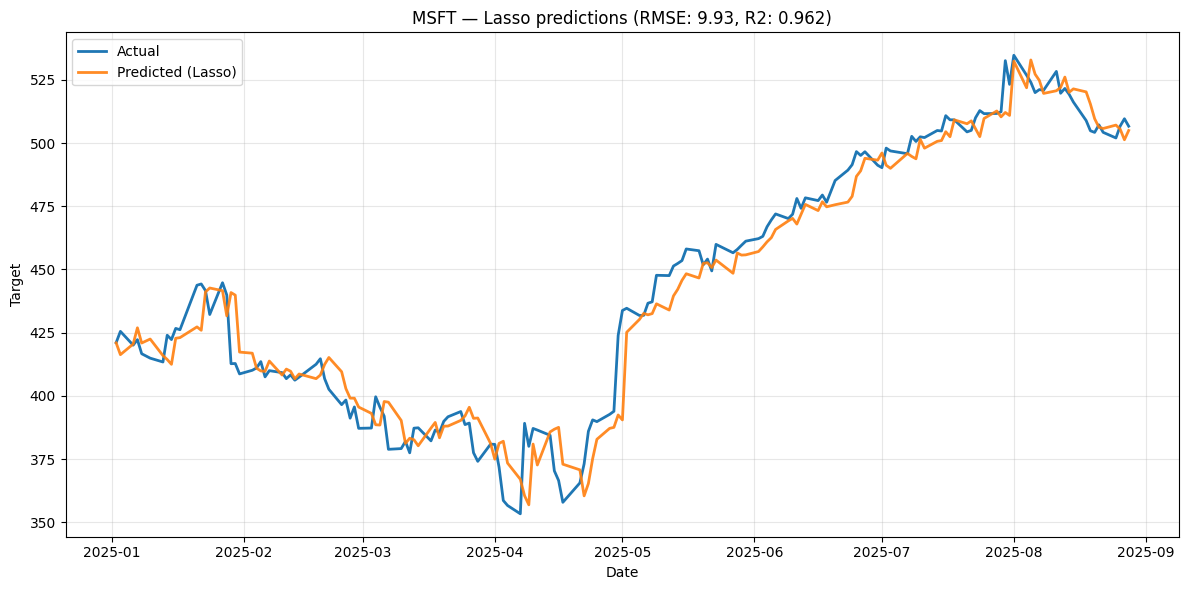

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

with open("stocks.txt", "r") as f:
    stocks = [line.strip() for line in f if line.strip()]

for stock in stocks:
    df = pd.read_csv(
        f"csv/{stock}_indicators.csv",
        index_col=0,       # use first column ("Date") as index
        parse_dates=[0],    # parse it as datetime
        date_format="ISO8601" #Specify date fromat
    ) 

    # Prepare data
    Y = df["Target"]
    X = df.drop(columns=["Target", "Close"])

    # Split data
    train_mask = X.index < "2025-01-01"
    test_mask = X.index >= "2025-01-01"

    X_train = X[train_mask]
    X_test = X[test_mask]
    Y_train = Y[train_mask] 
    Y_test = Y[test_mask]

    print(f"\n--- LASSO for {stock} ---")
    # pipeline: scaling then Lasso
    pipeline = make_pipeline(StandardScaler(), Lasso(random_state=42))

    # grid to reduce convergence problems and tune alpha
    param_grid = {
        'lasso__alpha': [0.001, 0.01, 0.1, 0.5, 1.0],
        'lasso__max_iter': [1000, 5000, 10000]
    }

    gs = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=0)
    gs.fit(X_train, Y_train)

    best = gs.best_estimator_
    best_params = gs.best_params_
    y_pred = best.predict(X_test)

    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)

    print(f"Best params: {best_params}")
    print(f"RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {r2:.4f}")

    # coefficients (after scaling, pipeline steps: [scaler, lasso])
    try:
        lasso = best.named_steps['lasso']
        coef = pd.Series(lasso.coef_, index=X_train.columns)
        top_coef = coef.abs().sort_values(ascending=False).head(10)
        print("Top coefficients:\n", top_coef.to_string())
    except Exception:
        pass

    # quick plot
    plt.figure(figsize=(12,6))
    plt.plot(Y_test.index, Y_test, label='Actual', color='#1f77b4', linewidth=2)
    plt.plot(Y_test.index, y_pred, label='Predicted (Lasso)', color='#ff7f0e', linewidth=2, alpha=0.9)
    plt.title(f"{stock} — Lasso predictions (RMSE: {rmse:.2f}, R2: {r2:.3f})")
    plt.xlabel("Date")
    plt.ylabel("Target")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()